# GACSE Workshop

In [36]:
from __future__ import print_function

In [37]:
import sys
sys.path.append('../build/')

In [38]:
%pylab inline
np.set_printoptions(precision=4, suppress=True)


Populating the interactive namespace from numpy and matplotlib


In [39]:
import versor as vsr

In [40]:
from motor_estimation import MotorEstimationSolver

In [41]:
fig_width_pt =  332.89726               # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (sqrt(5.0)-1.0)/2.0       # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size = [fig_width,fig_height]
params = {
    'axes.labelsize': 9,
    'font.size': 9,
    "font.family": "serif",
    "font.serif": [],
    'legend.fontsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'text.latex.preamble':[r'\usepackage{amsmath}', r'\usepackage{bm}'],
    'figure.figsize': fig_size,
    'axes.linewidth': 0.5
}
matplotlib.rcParams.update(params)

## Ground truth motor

In [42]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
print(motor)
print(motor.log())

Mot: [ 0.87 0 -0.5 0 -0.68 -0.43 -0.18 -0.25 ]
Dll: [ 0 -0.5236 0 -0.7152 -0.5 -0.1917 ]


## Motor Estimation from Points

### Dataset generation

In [43]:
n_points = 10
sigma = 0.09
points_a = [vsr.Vec(*np.random.normal(0.0, 0.8, 3)).null() 
            for i in range(n_points)]
points_b = [point.spin(motor) for point in points_a]
points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                            + sigma * np.random.randn(3))).null() 
                  for point in points_b]

### Estimate motor using local parameterization

In [44]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(points_a, points_b):
#     mes.add_point_correspondences_residual_block(a,b)
    mes.add_point_distance_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary_point_1) = mes.solve()
print(summary_point_1['brief_report'])

Ceres Solver Report: Iterations: 15, Initial cost: 2.605360e+01, Final cost: 2.740283e-16, Termination: CONVERGENCE


[]

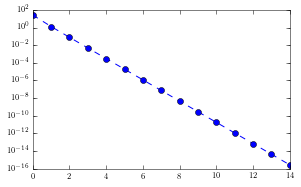

In [45]:
plt.plot([it['cost'] for it in summary_point_1['iterations'] ], linestyle='--', marker='o')
plt.semilogy()

Ceres Solver Report: Iterations: 15, Initial cost: 2.605360e+01, Final cost: 2.740283e-16, Termination: CONVERGENCE


[]

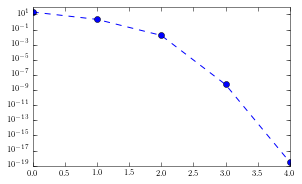

In [46]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(points_a, points_b):
    mes.add_point_correspondences_residual_block(a,b)
#     mes.add_point_distance_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary_point_2) = mes.solve()
print(summary_point_1['brief_report'])
plt.plot([it['cost'] for it in summary_point_2['iterations'] ], linestyle='--', marker='o')
plt.semilogy()

#### Check solution

In [47]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.866 -0.    -0.5   -0.    -0.683 -0.433 -0.183 -0.25 ]
True


### Estimate motor using bivector

In [48]:
initial_motor = vsr.Mot(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(points_a, points_b):
    mes.add_point_correspondences_dll_residual_block(a,b)
# mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary_point_2) = mes.solve()
estimated_motor = vsr.Dll(*np.array(estimated_motor)[:6]).exp()
print(summary_point_2['brief_report'])

AttributeError: 'MotorEstimationSolver' object has no attribute 'add_point_correspondences_dll_residual_block'

#### Check solution

In [12]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.866 -0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
True


### Plot

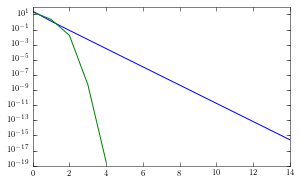

In [49]:
plt.clf()
plt.figure(1)
# plt.subplot(311)
plt.plot([it['cost'] for it in summary_point_1['iterations'] ])

# # plt.subplot(312)
# plt.plot([it['cost'] for it in lin_summary_2['iterations'] ])

# # plt.subplot(313)
# plt.plot([it['cost'] for it in lin_summary_3['iterations'] ])

plt.plot([it['cost'] for it in summary_point_2['iterations'] ])

# plt.loglog()
plt.yscale('log')

## Motor Estimation from Lines

### Dataset generation

In [73]:
lines_a = [vsr.Dll(vsr.Vec(*np.random.normal(0.0,0.8,3)),
                   vsr.Vec(*np.random.normal(0.0,0.8,3)))
          for i in range(10)]
lines_b = [line.spin(motor) for line in lines_a]

In [74]:
la - lb

Dll: [ -0.28 0 -1.841 3.084 -2.618 1.314 ]

In [75]:
la.acomm(lb)

Mot: [ -2.2 0 0 0 0 -4.4e-16 0 6 ]

### Estimate motor using commutator product

In [77]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_commutator_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_4 = mes.solve()
print(estimated_motor)
print(lin_summary_4['brief_report'])

Mot: [ 0.87 -1.3e-11 -0.5 2e-11 -0.68 -0.43 -0.18 -0.25 ]
Ceres Solver Report: Iterations: 5, Initial cost: 3.234285e+01, Final cost: 8.268629e-20, Termination: CONVERGENCE


#### Check solution

In [78]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.866 -0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
True


### Estimate motor using 6 residuals

$$ \arg \min_M \frac{1}{2} \sum_{i=1}^n \left| M \varLambda_{b_i} \tilde{M} - \varLambda_{a_i}  \right| $$

In [79]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_1 = mes.solve()
print(lin_summary_1['brief_report'])

Ceres Solver Report: Iterations: 6, Initial cost: 1.750525e+01, Final cost: 1.149944e-26, Termination: CONVERGENCE


#### Check solution

In [80]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.866 -0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
True


### Estimate motor using 4 residuals

In [85]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_2 = mes.solve()
print(lin_summary_2['full_report'])


Solver Summary (v 1.12.0-eigen-(3.2.92)-lapack-suitesparse-(4.4.6)-openmp)

                                     Original                  Reduced
Parameter blocks                            1                        1
Parameters                                  8                        8
Effective parameters                        6                        6
Residual blocks                            10                       10
Residual                                   40                       40

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver threads                       1                        1

Cost:
Initial                          2.092526e+01
Final              

#### Check solution

In [56]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.8661 -0.0002 -0.4999 -0.0002 -0.6832 -0.4329 -0.1829 -0.2496]
False
True


In [57]:
rtol = 1e-5
atol = 1e-3
[np.abs(a - b) <= atol + rtol * np.abs(b) for a, b in zip(np.array(motor), np.array(estimated_motor))]

[True, True, True, True, True, True, True, True]

#### Decompose error into rotation and translation

In [58]:
cos_theta = estimated_motor[0]
theta = np.arccos(cos_theta)
print(np.abs(np.rad2deg(theta - pi / 6.)))
print(np.abs(theta - pi / 6.))

0.00549598806565
9.59230873959e-05


In [59]:
3e-4

0.0003

In [60]:
rot = vsr.Rot(*np.array(estimated_motor)[:4])

In [61]:
R = estimated_motor.rot()

AttributeError: 'Mot' object has no attribute 'rot'

In [62]:
T = estimated_motor.trs()

AttributeError: 'Mot' object has no attribute 'trs'

In [63]:
v = R.log().unit().duale()
print(v)

NameError: name 'R' is not defined

In [64]:
u = motor.rot().log().unit().duale()
print(u)

AttributeError: 'Mot' object has no attribute 'rot'

In [65]:
motor.log()

Dll: [ 0 -0.5236 0 -0.7152 -0.5 -0.1917 ]

In [66]:
estimated_motor.log()

Dll: [ -0.0002425 -0.5235 -0.0002602 -0.7154 -0.4998 -0.1915 ]

In [67]:
np.allclose(np.array(T),np.array(vsr.Vec(1,1,1).trs()))

NameError: name 'T' is not defined

In [168]:
np.array(T)

array([ 1.    , -0.5008, -0.5005, -0.5005])

In [169]:
np.array(R)

array([ 0.8667, -0.0007, -0.4988,  0.001 ])

In [170]:
np.array(motor)

array([ 0.866,  0.   , -0.5  ,  0.   , -0.683, -0.433, -0.183, -0.25 ])

In [171]:
t = T.vec()
B = R.log().unit()
B.reject(t)

Vec: [ 0.002 1 -0.0014 ]

In [172]:
B.project(t)

Vec: [ 1 -0.0006 1 ]

In [173]:
(vsr.Vec(1,1,1).norm() - T.vec().norm())

-0.0021292367808289914

In [174]:
1.4e-4 * 1000

0.13999999999999999

### Estimate motor using 2 residuals

In [90]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_norm_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_3 = mes.solve()
print(lin_summary_3['full_report'])


Solver Summary (v 1.12.0-eigen-(3.2.92)-lapack-suitesparse-(4.4.6)-openmp)

                                     Original                  Reduced
Parameter blocks                            1                        1
Parameters                                  8                        8
Effective parameters                        6                        6
Residual blocks                            10                       10
Residual                                   20                       20

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver threads                       1                        1

Cost:
Initial                          2.092526e+01
Final              

#### Check solution

In [69]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.8658  0.0002 -0.5003  0.0002 -0.6833 -0.4327 -0.1829 -0.2503]
False
True


### Plots

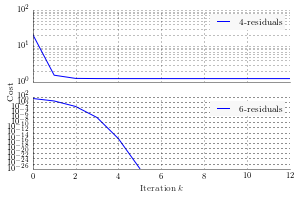

In [91]:
fig, ax = plt.subplots(2, sharex=True)

ax[0].set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax[0].spines[spine].set_visible(False)
    ax[1].spines[spine].set_visible(False)
    
ax[0].xaxis.set_ticks_position('none')
ax[0].yaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[1].yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax[0].spines[spine].set_linewidth(0.5)
    ax[0].spines[spine].set_color(almost_black)
    ax[1].spines[spine].set_linewidth(0.5)
    ax[1].spines[spine].set_color(almost_black)
ax[0].xaxis.label.set_color(almost_black)
ax[0].yaxis.label.set_color(almost_black)
ax[1].xaxis.label.set_color(almost_black)
ax[1].yaxis.label.set_color(almost_black)

# ax.plot([it['cost'] for it in lin_summary_4['iterations'] ], label=r"commutator")
# ax[0].plot([it['cost'] for it in lin_summary_3['iterations'] ], label=r"$2$-residuals", c='red')
ax[0].plot([it['cost'] for it in lin_summary_2['iterations'] ], label=r"$4$-residuals")
ax[1].plot([it['cost'] for it in lin_summary_1['iterations'] ], label=r"$6$-residuals")

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].grid(which="both")
ax[1].grid(which="both")

# ax[0].set_xscale('log')

# plt.yscale('log')

# ax[0].title.set_color(almost_black)
# ax[0].axhline(0, color=almost_black, linewidth=0.15)
# ax[0].axvline(0, color=almost_black, linewidth=0.15)
# ax[1].title.set_color(almost_black)
# ax[1].axhline(0, color=almost_black, linewidth=0.15)
# ax[1].axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.
light_grey = np.array([float(248)/float(255)]*3)
legend = ax[0].legend(frameon=True, scatterpoints=1)
rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)
legend = ax[1].legend(frameon=True, scatterpoints=1)
rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)

fig.text(0.06, 0.5, 'Cost', ha='center', va='center', rotation='vertical')

# plt.tight_layout()
plt.xlabel(r'Iteration $k$')
# fig.ylabel(r'Cost')
# ax[1].ylabel(r'Cost')

plt.savefig('/home/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_lines2.pdf')

In [144]:
[it['cost'] for it in lin_summary_3['iterations'] ]

[31.297582314046107,
 2.6383011829511096,
 3.3454204054032175,
 3.331352531311868,
 3.2492017840979552,
 2.6379942109598202,
 1.254893337698162,
 1.2507909525655365,
 1.2505749378670035,
 1.25008264753854,
 1.2500000671124123]

In [86]:
[it['cost'] for it in lin_summary_2['iterations'] ]

[16.363652126624267,
 1.4707407869128022,
 1.2588626547760942,
 1.2511735688915604,
 1.2502739745315852,
 1.2503670697767595,
 1.250362487599549,
 1.250336331376119,
 1.2501720827194558,
 1.2503312412410628,
 1.250209060517524,
 1.2500200839170326,
 1.2500054380383285]

In [ ]:
plt.figure(1)
# plt.subplot(311)
plt.plot([it['cost'] for it in lin_summary_1['iterations'] ])

# # plt.subplot(312)
# plt.plot([it['cost'] for it in lin_summary_2['iterations'] ])

# # plt.subplot(313)
# plt.plot([it['cost'] for it in lin_summary_3['iterations'] ])

plt.plot([it['cost'] for it in lin_summary_4['iterations'] ])

# plt.loglog()
plt.yscale('log')

# plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_lines.pdf')

In [ ]:
fig, ax = plt.subplots(1)
ax.plot([it['gradient_max_norm'] for it in lin_summary_1['iterations'] ])
ax.plot([it['gradient_max_norm'] for it in lin_summary_2['iterations'] ])
ax.plot([it['gradient_max_norm'] for it in lin_summary_3['iterations'] ])

## Motor Estimation from planes

### Dataset generation

In [254]:
n_planes = 10
planes_a = []
for i in range(10):
    dir_vec = np.random.normal(0.0, 0.8, 4)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    distance = np.random.normal(0.0, 0.8,1)
    arr = dir_vec + distance
    planes_a.append(vsr.Dlp(dir_vec[0],dir_vec[1],dir_vec[2],distance[0]))
planes_b = [plane.spin(motor) for plane in planes_a]

### Estimate motor using 2 residuals

In [261]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor_plane = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/24)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(planes_a, planes_b):
#     mes.add_dual_plane_angle_error_residual_block(a,b.spin(noise_motor_plane))
    mes.add_dual_plane_angle_error_residual_block(a,b)

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-8
mes.max_num_iterations = 100
estimated_motor, pln_summary_1 = mes.solve()
print(pln_summary_1['brief_report'])

Ceres Solver Report: Iterations: 26, Initial cost: 4.463665e+01, Final cost: 1.250000e+00, Termination: CONVERGENCE


In [262]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

[ 0.866  0.    -0.5    0.    -0.683 -0.433 -0.183 -0.25 ]
[ 0.866 -0.    -0.5   -0.    -0.683 -0.433 -0.183 -0.25 ]
False
True


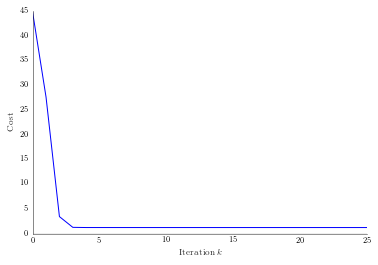

In [263]:
fig, ax = plt.subplots(1)

# ax.set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)
ax.xaxis.label.set_color(almost_black)
ax.yaxis.label.set_color(almost_black)

ax.plot([it['cost'] for it in pln_summary_1['iterations'] ])

ax.title.set_color(almost_black)
ax.axhline(0, color=almost_black, linewidth=0.15)
ax.axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.

# light_grey = np.array([float(248)/float(255)]*3)
# legend = ax.legend(frameon=True, scatterpoints=1)
# rect = legend.get_frame()
# rect.set_facecolor(light_grey)
# rect.set_linewidth(0.0)

plt.xlabel(r'Iteration $k$')
plt.ylabel(r'Cost')


# plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_planes.pdf')

## Motor Estimation from tangents

### Dataset generation

In [ ]:
n_tangents = 10
tangents_a = []
for i in range(n_tangents):
    dir_vec = np.random.normal(0.0, 0.8, 3)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    pos = np.random.normal(0.0, 0.8, 3)
    tangents_a.append(vsr.Tnv(vsr.Vec(*dir_vec)).spin(vsr.Vec(*pos).trs() * 
                                             vsr.Rot(1,0,0,0)))

tangents_b = [tangent.spin(motor) for tangent in tangents_a]

### Estimate motors using flags

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(tangents_a, tangents_b):
    dir_vec = np.random.normal(0.0, 0.8, 3)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    pos = np.random.normal(0.0, 0.01, 3)
    angle = np.random.normal(0.0, pi/1000., 1)
    noise_motor_tangent = vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*dir_vec).unduale() * angle[0])
    b = b.spin(noise_motor_tangent)
    mes.add_point_correspondences_residual_block(a.pnt(), b.pnt())
    mes.add_line_correspondences_residual_block(a.lin().dual(), b.lin().dual())
#     mes.add_tangent_vector_point_angle_error_residual_block(a,b)

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-8
mes.max_num_iterations = 200
em, summary = mes.solve()
print(motor)
print(em)
print(summary['brief_report'])

### Estimate motor

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(tangents_a, tangents_b):
    mes.add_tangent_vector_point_angle_error_residual_block(a,b)

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-8
mes.max_num_iterations = 2000
em, summary = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(summary['full_report'])

## Motor Estimation from Circles

### Dataset generation

In [ ]:
n_circles = 5
circles_a = []
for i in range(n_circles):
    dir_vec = np.random.normal(0.0, 0.8, 3)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    pos = np.random.normal(0.0, 0.8, 3)
    radius = np.random.normal(0.0, 0.8, 1)
    circles_a.append(vsr.Cir(vsr.Vec(*pos).null(), radius[0], 
                             vsr.Vec(*(dir_vec)).unduale()))

circles_b = [circle.spin(motor) for circle in circles_a]

### Estimate motor

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(circles_a, circles_b):
#     mes.add_point_correspondences_residual_block(a.pnt(), b.pnt())
    mes.add_dual_plane_angle_error_residual_block(a.pln().dual(), b.pln().dual())

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-6
mes.max_num_iterations = 2000
em, summary = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(summary['full_report'])

## Motor Estimation from Spheres

### Dataset generation

In [ ]:
n_spheres = 5
spheres_a = []
for i in range(n_spheres):
    pos = np.random.normal(0.0, 0.8, 3)
    radius = np.random.normal(0.0, 0.8, 1)
    spheres_a.append(vsr.Sph(vsr.Vec(*pos).null(), radius[0]))
spheres_b = [sphere.spin(motor) for sphere in spheres_a]

### Estimate motor

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(spheres_a, spheres_b):
    mes.add_point_correspondences_residual_block(a.pnt(),b.pnt())
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary) = mes.solve()
print(summary['brief_report'])

## Motor Estimation from heterogeneous conformal objects

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)

noise_motor_plane = vsr.Vec(0.05,0.05,0.05).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)
noise_motor_lines = vsr.Vec(-0.01,-0.01,-0.01).trs() * vsr.Rot(vsr.Biv(0,1,0) * (-np.pi/100))
noise_motor_points = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,0,1) * (np.pi/100))

initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(planes_a, planes_b):
    mes.add_dual_plane_angle_error_residual_block(a,b)
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(a,b)
for a, b in zip(points_a, points_b):
    mes.add_point_correspondences_residual_block(a,b)
    
    

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
# mes.function_tolerance = 1e-8
mes.max_num_iterations = 100
em, summary_het = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-5))
print(summary_het['full_report'])

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)

noise_motor_planes = vsr.Vec(0.05,0.05,0.05).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)
noise_motor_lines = vsr.Vec(-0.01,-0.01,-0.01).trs() * vsr.Rot(vsr.Biv(0,1,0) * (-np.pi/100))
noise_motor_points = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,0,1) * (np.pi/100))

initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(planes_a, planes_b):
    mes.add_dual_plane_angle_error_residual_block(a,b.spin(noise_motor_plane))
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(a,b.spin(noise_motor_lines))
for a, b in zip(points_a, points_b):
    mes.add_point_correspondences_residual_block(a,b.spin(noise_motor_points))
    
    

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
# mes.function_tolerance = 1e-8
mes.max_num_iterations = 100
em, summary_het_noise = mes.solve()
print(initial_motor)
print(motor)
print(em)
print(summary_het_noise['full_report'])

NameError: name 'summary_het' is not defined

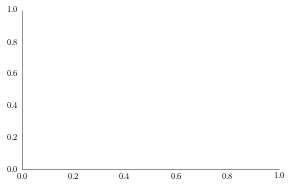

In [32]:
fig, ax = plt.subplots(1)

# ax.set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)
ax.xaxis.label.set_color(almost_black)
ax.yaxis.label.set_color(almost_black)

ax.plot([it['cost'] for it in summary_het['iterations'] ], label="Without noise")
ax.plot([it['cost'] for it in summary_het_noise['iterations']], label="With noise")


ax.title.set_color(almost_black)
ax.axhline(0, color=almost_black, linewidth=0.15)
ax.axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.

light_grey = np.array([float(248)/float(255)]*3)
legend = ax.legend(frameon=True, scatterpoints=1)
rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)

plt.xlabel(r'Iteration $k$')
plt.ylabel(r'Cost')


# plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_heterogeneous.pdf')

## Hand Eye Calibration

### Set up motors

In [ ]:
M_object_in_world = vsr.Vec(1.0,1.0,0.1).trs() * vsr.Biv(pi/4.0, 0.0,0.0).exp()
M_eye_in_hand = vsr.Vec(0.1, 0.2, 0.3).trs() * vsr.Biv(0.0,1.0,0.0).exp()
M_eye_in_hand_initial = vsr.Vec(0.11, 0.24, 0.36).trs() * (vsr.Biv(1.0,1.0,0.0).unit() * (np.pi/5.)).exp()

### Dataset generation

In [ ]:
def hand_eye_pose_pairs(M_object_in_world, M_eye_in_hand, n):
    pose_pairs = [
            (M_hand_in_world, 
             (M_eye_in_hand.rev() * M_hand_in_world.rev() * M_object_in_world))
            for M_hand_in_world in [vsr.Vec(*np.random.rand(3)).trs() *
                                    vsr.Rot(vsr.Biv(*np.random.rand(3)).unit() *
                                            np.random.rand() * np.pi)
                                    for i in range(n)]]

    As = [pose_pair[0] for pose_pair in pose_pairs]
    Bs = [pose_pair[1] for pose_pair in pose_pairs]

    LAs = []
    LBs = []
    for i in range(n):
        for j in range(i+1,n):
            LAs.append(((As[j].rev() * As[i]).log() * 0.5).unit())
            LBs.append(((Bs[j] * Bs[i].rev()).log() * 0.5).unit())
    return LAs, LBs

In [ ]:
n_lines = 10
lines_a, lines_b = hand_eye_pose_pairs(M_object_in_world, M_eye_in_hand, n_lines)
print(len(lines_a))

### Estimate hand-eye motor 

In [ ]:
mes = MotorEstimationSolver(M_eye_in_hand_initial)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-16
estimated_motor, summary = mes.solve()
print(summary['full_report'])

#### Check solution

In [ ]:
print(np.array(M_eye_in_hand))
print(np.array(estimated_motor))
print(np.allclose(np.array(M_eye_in_hand), np.array(estimated_motor)))

### Real Experiment

In [ ]:
import cPickle as pickle
import math3d as m3d

#### Dataset generation

In [ ]:
rob_pose_list = pickle.load(open('pose_list.dump'))
obj_pose_list = pickle.load(open('obj_pose_list.dump'))
a_trfs = pickle.load(open('as.dump'))
b_trfs = pickle.load(open('bs.dump'))

In [ ]:
rob_motors = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in rob_pose_list]]
obj_motors = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in obj_pose_list]]

In [ ]:
n_lines = len(rob_motors)
lines_a = []
lines_b = []
for i in range(n_lines):
    for j in range(i+1,n_lines):
        lines_a.append(((rob_motors[j].rev() * rob_motors[i]).log() * 0.5).unit())
        lines_b.append(((obj_motors[j].rev() * obj_motors[i]).log() * 0.5).unit())

In [ ]:
n_lines = len(a_trfs)
motors_a = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in a_trfs]]
motors_b = [vsr.Vec(*pos).trs() * vsr.Rot(vsr.Vec(*axis).unduale() * angle / 2.)
              for pos, (axis, angle) in [(m3d.Transform(pose).pos, 
                                          m3d.Transform(pose).orient.axis_angle)
                                         for pose in b_trfs]]
lines_a = [motor.log() for motor in motors_a]
lines_b = [motor.log() for motor in motors_b]

#### Estimate hand-eye motor

In [ ]:
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_correspondences_residual_block(b,a)
#     mes.add_line_angle_distance_residual_block(b,a)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.max_num_iterations = 25
mes.function_tolerance = 1e-12
estimated_motor, summary = mes.solve()
print(summary['full_report'])

In [ ]:
print(estimated_motor)
print(m3d.Transform(estimated_motor.matrix()))

#### Combination of estimates

In [ ]:
bivectors = [np.array((r * estimated_motor * o.rev()).log()) 
             for r, o in zip(rob_motors, obj_motors)]
m = vsr.Dll(*np.average(bivectors,0)).exp()
print(m3d.Transform(m.matrix()))

#### Tsai Lenz Solver

In [ ]:
from tsai_lens_calibration import TsaiLenzCalibrator

In [ ]:
pose_pairs = [(m3d.Transform(A), m3d.Transform(B)) 
              for (A, B)  in zip(rob_pose_list, obj_pose_list)]
tsai_lens = TsaiLenzCalibrator(pose_pairs)
tsai_lens.sensor_in_flange

#### Park Martin Solver

In [ ]:
from park_martin import calibrate as park_martin_calibration
A, B = [], []
n_trfs = len(rob_pose_list)
for i in range(n_trfs):
    for j in range(i+1, n_trfs):
        A.append((m3d.Transform(rob_pose_list[j]).inverse * m3d.Transform(rob_pose_list[i])).array)
        B.append((m3d.Transform(obj_pose_list[j]).inverse * m3d.Transform(obj_pose_list[i])).array)
R,t = park_martin_calibration(A,B)
print(m3d.Transform(R,t))

In [ ]:
def daniilidis(LAs, LBs):
    def skew(v):
        skv = roll(roll(diag(v.flatten()), 1, 1), -1, 0)
        return skv - skv.T
    
    Ds = []
    for LA, LB in zip(LAs, LBs):
        LA = LA.unit()
        LB = LB.unit()
        D = np.zeros((6,8))
        a = np.array(LA).copy()[:3]
        a = np.array([a[2], -a[1], a[0]])
        b = np.array(LB).copy()[:3]
        b = np.array([b[2], -b[1], b[0]])
        aprime = np.array(LA).copy()[3:]
        bprime = np.array(LB).copy()[3:]
        # Upper 3
        D[:3,0] = a - b
        D[:3,1:4] = skew(a + b)
        # Lower 3
        D[3:,0] = aprime - bprime
        D[3:,1:4] = skew(aprime + bprime)
        D[3:,4] = a - b 
        D[3:,5:8] = skew(a + b)  
        Ds.append(D)
    Ds = np.array(Ds).reshape(-1,8)
    
    [U, s, Vt] = np.linalg.svd(Ds)
    v7 = Vt.T[:,-2]
    v8 = Vt.T[:,-1]
    u1 = v7[:4]
    v1 = v7[4:]
    u2 = v8[:4]
    v2 = v8[4:]
    
    a = np.inner(u1,v1)
    b = np.inner(u1,v2) + np.inner(u2,v1)
    c = np.inner(u2,v2)
    [s1, s2] = np.roots([a,b,c])
    
    val1 = (s1**2 * np.inner(u1,u1)) + (2 * s1 * np.inner(u1,u2)) + (np.inner(u2,u2))
    val2 = (s2**2 * np.inner(u1,u1)) + (2 * s2 * np.inner(u1,u2)) + (np.inner(u2,u2))

    if val1 > val2:
        s = s1
        val = val1
    else:
        s = s2
        val = val2

    lambda2 = np.sqrt(1./val)
    lambda1 = s * lambda2
    
    m_arr = lambda1 * v7 + lambda2 * v8
    m_arr[1:4] = np.array([m_arr[3], -m_arr[2], m_arr[1]])
    m_arr[4:8] = np.roll(m_arr[4:8], -1)
    
    print(Ds)
    
    return vsr.Mot(*m_arr)

In [ ]:
daniilidis_motor = daniilidis(lines_b, lines_a)

In [ ]:
print(m3d.Transform(daniilidis_motor.matrix()))

In [ ]:
print(estimated_motor * estimated_motor.rev())
print(daniilidis_motor * daniilidis_motor.rev())

In [ ]:
bivectors = [np.array((r * daniilidis_motor * o.rev()).log()) 
             for r, o in zip(rob_motors, obj_motors)]
m = vsr.Dll(*np.average(bivectors,0)).exp()
print(m3d.Transform(m.matrix()))